In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [0]:
!wget 'https://fyp-content-bucket.s3.amazonaws.com/Dataset.zip'

--2019-11-19 23:38:26--  https://fyp-content-bucket.s3.amazonaws.com/Dataset.zip
Resolving fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)... 52.216.136.99
Connecting to fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)|52.216.136.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4013338444 (3.7G) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]   3.74G  13.9MB/s    in 4m 41s  

2019-11-19 23:43:07 (13.6 MB/s) - ‘Dataset.zip’ saved [4013338444/4013338444]



In [0]:
!unzip "Dataset.zip"

In [0]:
path = Path("/root/.fastai/data/Dataset/MICC-F2000"); path

PosixPath('/root/.fastai/data/Dataset/MICC-F2000')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(), size=224)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1340 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tampered,Tampered,Tampered,Tampered,Tampered
Path: /root/.fastai/data/Dataset/MICC-F2000;

Valid: LabelList (660 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tampered,Tampered,Tampered,Tampered,Tampered
Path: /root/.fastai/data/Dataset/MICC-F2000;

Test: None

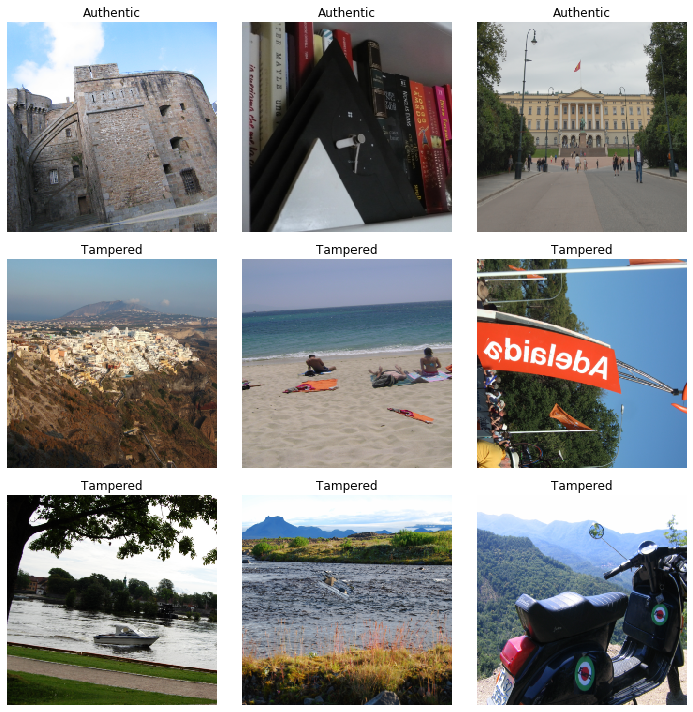

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
print(data.classes)
len(data.classes),data.c

['Authentic', 'Tampered']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 288MB/s]


In [0]:
learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.197871,0.809758,0.377273,03:13
1,0.941069,0.448878,0.156061,03:09
2,0.758937,0.398977,0.136364,03:10
3,0.626099,0.370995,0.109091,03:10
4,0.535984,0.311918,0.072727,03:09
5,0.456477,0.328121,0.077273,03:10
6,0.402295,0.335815,0.069697,03:11
7,0.362892,0.318549,0.068182,03:10


In [0]:
learn.save('attempt-1-resnet50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


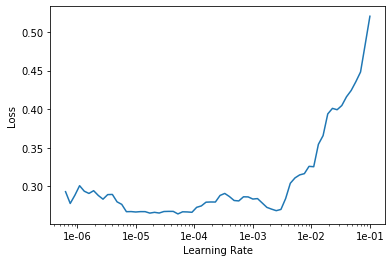

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.283708,0.365450,0.077273,03:09
1,0.292376,0.332104,0.066667,03:16
2,0.269301,0.326582,0.060606,03:15


In [0]:
learn.save('attempt-2-50resnet')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Authentic', 'Tampered', 40)]

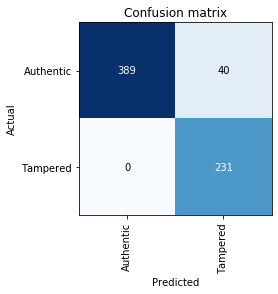

In [0]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


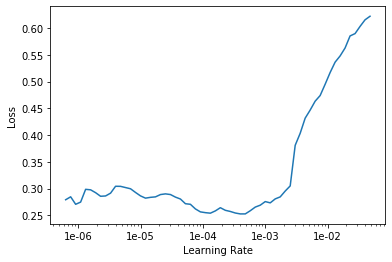

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.233289,0.326128,0.056061,03:13
1,0.248312,0.352558,0.059091,03:13
2,0.252588,0.364611,0.050000,03:13
3,0.228463,0.343710,0.050000,03:14
4,0.221490,0.355801,0.053030,03:12


In [0]:
learn.save('attempt-3-50resnet')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Authentic', 'Tampered', 35)]

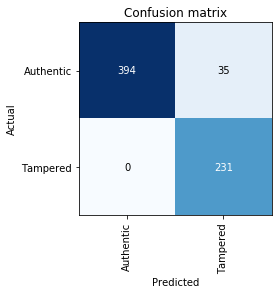

In [0]:
interp.plot_confusion_matrix()

Predictions

In [0]:
learn.export()

In [0]:
img = open_image(path/'00007tamp1.jpg')
img 

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Tampered